Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and preprocessing

In [2]:
car_data = pd.read_csv('C:/Users/Hai/Downloads/car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.shape

(301, 9)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data

In [8]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Spliliting the data and target

In [10]:
x =car_data.drop(['Car_Name','Selling_Price'],axis=1)
y=car_data['Selling_Price']

spliting the train and test data

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.1,random_state=2)

LinearRegression

In [12]:
lin_reg_model=LinearRegression()

In [13]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [14]:
training_data_prediction=lin_reg_model.predict(x_train)

In [15]:
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R Sqaured Error:",error_score )

R Sqaured Error: 0.87994516604937


<function matplotlib.pyplot.show(close=None, block=None)>

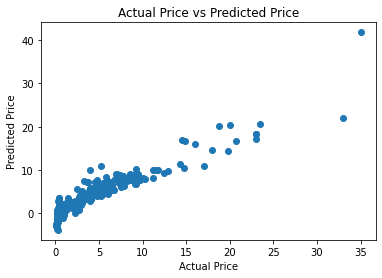

In [16]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show

In [17]:
lin_reg_model.fit(x_test,y_test)

LinearRegression()

In [18]:
test_data_prediction=lin_reg_model.predict(x_test)

Error

In [19]:
error_value= metrics.r2_score(y_test,test_data_prediction)
print('R Sqaured error :' , error_value)

R Sqaured error : 0.9616016091605228


<function matplotlib.pyplot.show(close=None, block=None)>

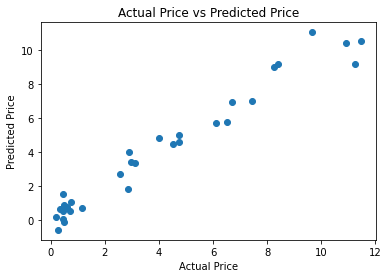

In [20]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show

Lasso Regression

In [21]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.1,random_state=2)

In [22]:
lasso_reg=Lasso()

In [23]:
lasso_reg.fit(x_train,y_train)

Lasso()

In [24]:
training_data_prediction=lasso_reg.predict(x_train)

Error

In [25]:
error_score =metrics.r2_score(y_train,training_data_prediction)
print('R squared error :',error_score)

R squared error : 0.8427856123435794


<function matplotlib.pyplot.show(close=None, block=None)>

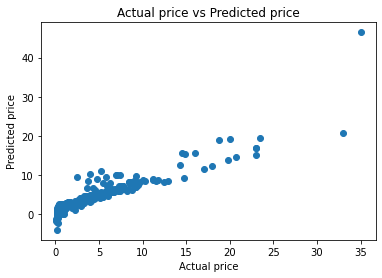

In [26]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show

In [27]:
lasso_reg.fit(x_test,y_test)

Lasso()

In [28]:
test_data_prediction=lasso_reg.predict(x_test)

In [29]:
error_score =metrics.r2_score(y_test,test_data_prediction)
print('R squared error :',error_score)

R squared error : 0.9148157845262993


<function matplotlib.pyplot.show(close=None, block=None)>

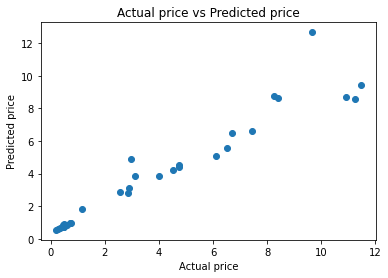

In [30]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs Predicted price')
plt.show

In [34]:
#import pickle
#file = open('random_linear_regression_model.pkl','wb')
#pickle.dump(lin_reg_model,file)